# Data analysis for Netflix TV Shows and Movies

# Objectives

- Clean Data for visualization
- Exploratory data analysis for useful insights

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data cleansing and manipulation

In [3]:
df = pd.read_csv('NetflixData.csv')
# Removed show id, setting title as index for df and transforming date_added to type datetime
df.drop(columns=['show_id','description'],inplace=True)
df = df.set_index('title')
df['date_added'] = pd.to_datetime(df['date_added'])
df.rename(columns={'listed_in':'categories'},inplace=True)
print("Dataframe shape: ",df.shape)
df.head()

Dataframe shape:  (8807, 9)


,type,director,cast,country,date_added,release_year,rating,duration,categories
title,,,,,,,,,
Dick Johnson Is Dead,Movie,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
Blood & Water,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
Ganglands,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
Jailbirds New Orleans,TV Show,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
Kota Factory,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [4]:
df['release_year'].min()

1925

Checking the type of each column.

In [5]:
df.dtypes

type                    object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
categories              object
dtype: object

### 1. Null values transformation

In [6]:
print(df.isnull().sum())

type               0
director        2634
cast             825
country          831
date_added        84
release_year       0
rating             4
duration           3
categories         0
dtype: int64


Dropping na values for columns country, date_added and duration, for not providing enough information for final visualizations.

In [7]:
# Dropping missing values for country, duration and date_added columns
df.dropna(subset=['country','date_added','duration'],inplace=True)
print(df.isnull().sum())

type               0
director        2155
cast             661
country            0
date_added         0
release_year       0
rating             3
duration           0
categories         0
dtype: int64


### 2. Duplicates transformation

Dropping duplicated data for reducing outliers and provide useful information.

In [8]:
df_duplicated = df[df.duplicated()]
print("Number of duplicated rows: ",df_duplicated.shape[0])

print("Dataframe before dropping duplicates: ",df.shape)
df = df.drop_duplicates()
print("Dataframe after dropping duplicates: ",df.shape)

Number of duplicated rows:  7
Dataframe before dropping duplicates:  (7893, 9)
Dataframe after dropping duplicates:  (7886, 9)


## Exploratory Data Analysis

### 1. Movie types

Making pie graph to see the proportion of tv shows and movies.

Text(0.5, 1.0, 'TV Shows and Movies proportion')

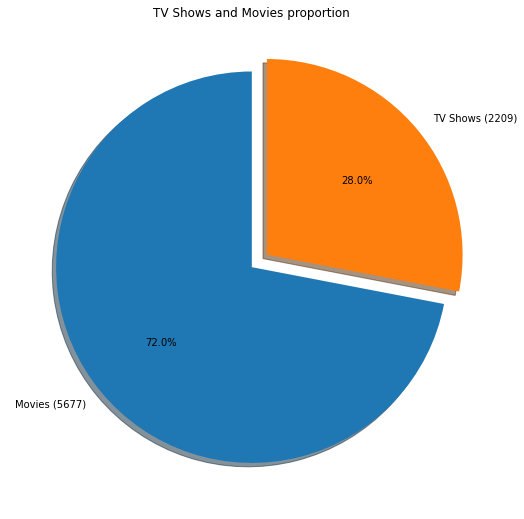

In [9]:
netflix_types = df['type'].value_counts()
labels = ['Movies (' + str(netflix_types[0]) + ')',
          'TV Shows (' + str(netflix_types[1]) + ')']

fig = plt.figure(figsize=(18,9))
plt.pie(x=netflix_types,labels=labels,shadow=True,
        radius=1,startangle=90,explode=(0,0.1),autopct='%1.1f%%')
plt.title("TV Shows and Movies proportion")

The graph shows that 72% of all entries in the dataset are movies, and that only 28% are tv shows.

### 2. Country percentage

Creating bar graph to show the top 20 countries of origin or production in the dataset. For simplicity, the rest of the entries were grouped in one group called other countries.

In [10]:
df_countries = df['country'].value_counts(ascending=False).head(20)
df_other_countries = df.shape[0] - df_countries.sum()
df_other_countries = pd.Series([df_other_countries],index=['Other countries'])
df_countries = df_countries.append(df_other_countries)

<AxesSubplot:title={'center':'Number of entries per country'}, xlabel='Countries', ylabel='Frequency'>

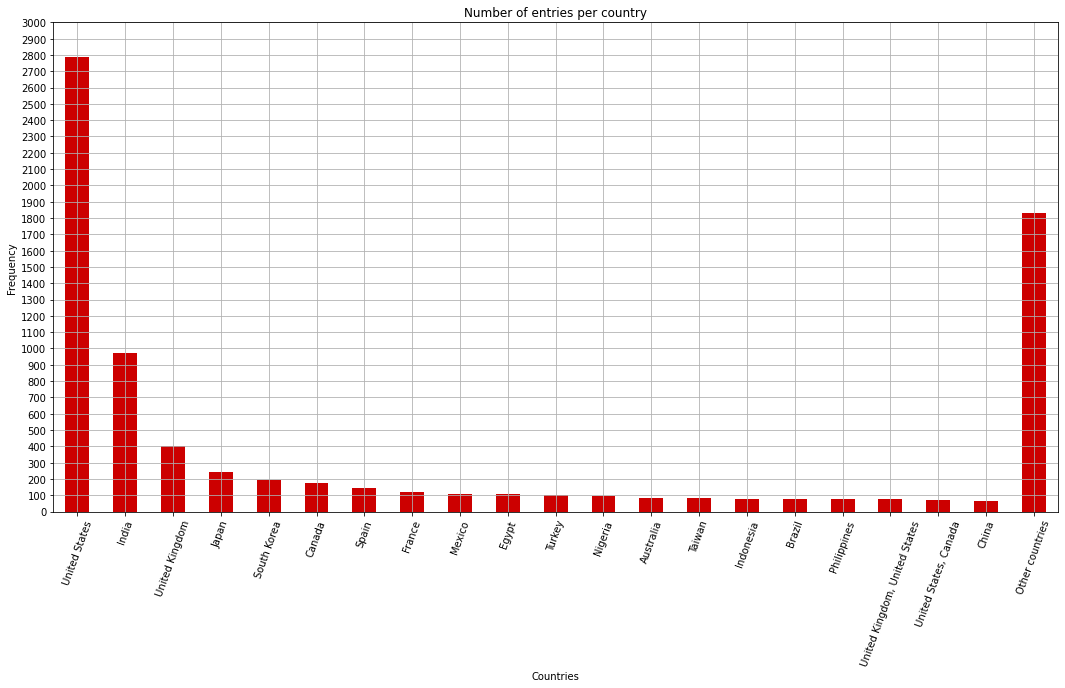

In [15]:
grid_lines = np.linspace(0.0,3000,31)
df_countries.plot.bar(rot=70,yticks=grid_lines,figsize=(18,9),grid=True,
                      title="Number of entries per country",xlabel="Countries",ylabel="Frequency",
                      color=["#CC0000"])

The majority of the movies and tv shows are produced in the US, India and the UK.

### 3. Releases per Year

Showing top 20 years of release from 1925 to 2021. All years of release that are not in the top 20 were grouped in a new category called "other years".

In [16]:
df_years = df['release_year'].value_counts(ascending=False).head(20)
df_other_years = df.shape[0] - df_years.sum()
other_years = pd.Series([df_other_years],index=['other years'])
df_years = df_years.append(other_years)

<AxesSubplot:title={'center':'Releases per year'}, xlabel='Year', ylabel='Frequency'>

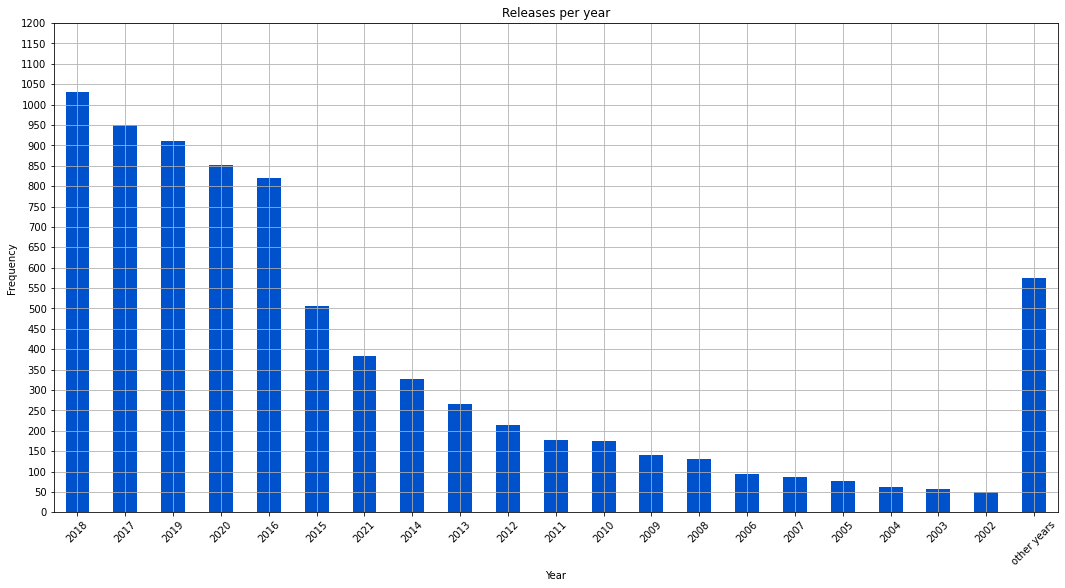

In [18]:
grid_lines = np.linspace(0.0,1200.0,25)
df_years.plot.bar(figsize=(18,9),title="Releases per year",xlabel="Year",rot=45,
                  ylabel="Frequency",grid=True,yticks=grid_lines,color=['#0052CC'])

According to the bar chart, the dataset mostly contains movies and tv shows from 2016 to 2021.

### 4. Top Categories

Determining the top 10 categories of the whole dataset. This process includes the separation of categores from the column "categories" for each row in the dataset.

In [19]:
# Getting categories frequency in a dictionary
df_categories = np.asarray(df['categories'])
categories_dict = {}
for category in df_categories:
    categories = category.split(", ")
    for cat in categories:
        if cat in categories_dict.keys(): categories_dict[cat] = categories_dict[cat] + 1
        else: categories_dict[cat] = 1

# Sorting dictionary
categories_dict = sorted(categories_dict.items(),key=lambda x:x[1])
sorted_categories_dict = dict(categories_dict)

<AxesSubplot:title={'center':'Most frequent categories'}, xlabel='Category', ylabel='Frequency'>

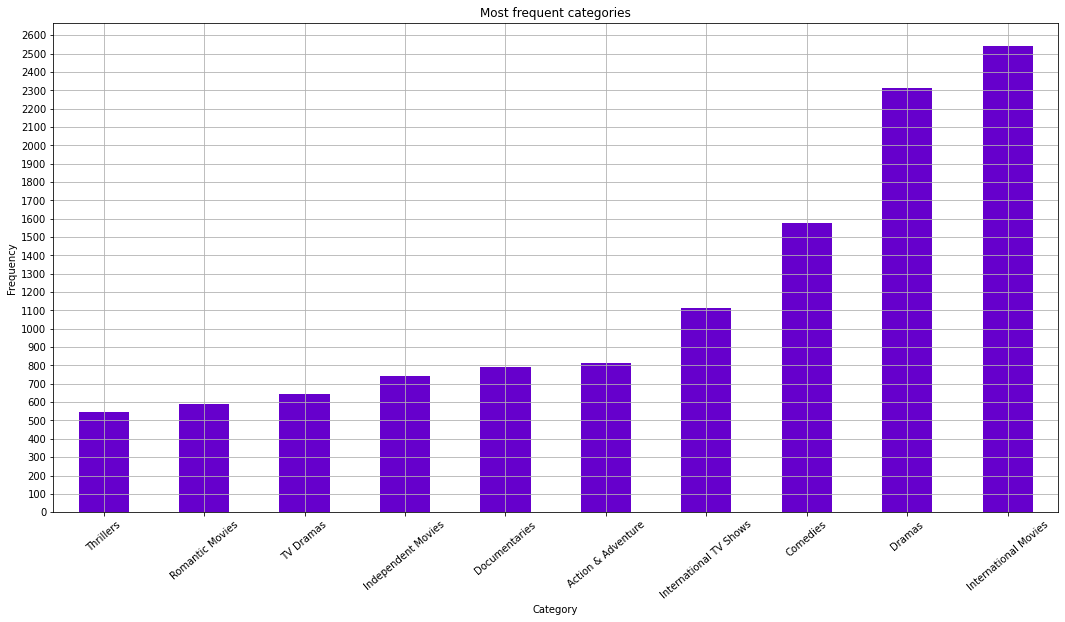

In [23]:
categories_series = pd.Series([x for x in sorted_categories_dict.values()],
                              index=[x for x in sorted_categories_dict.keys()]).tail(10)

categories_series.plot.bar(figsize=(18,9),title="Most frequent categories",
                            xlabel="Category",ylabel="Frequency",rot=40,grid=True,
                            yticks=np.linspace(0.0,2600.0,27),color=['#6600CC'])

According to the bar chart, netflix contains many international movies and entries considered as comedies and dramas.

## Exporting Clean data

In [ ]:
df.to_csv('NetflixCleanData.csv')